In [1]:
%gui qt
%matplotlib qt

In [2]:
import os.path as op
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path + '/subjects'
subject = 'sample'

Using surface: /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/bem/outer_skin.surf


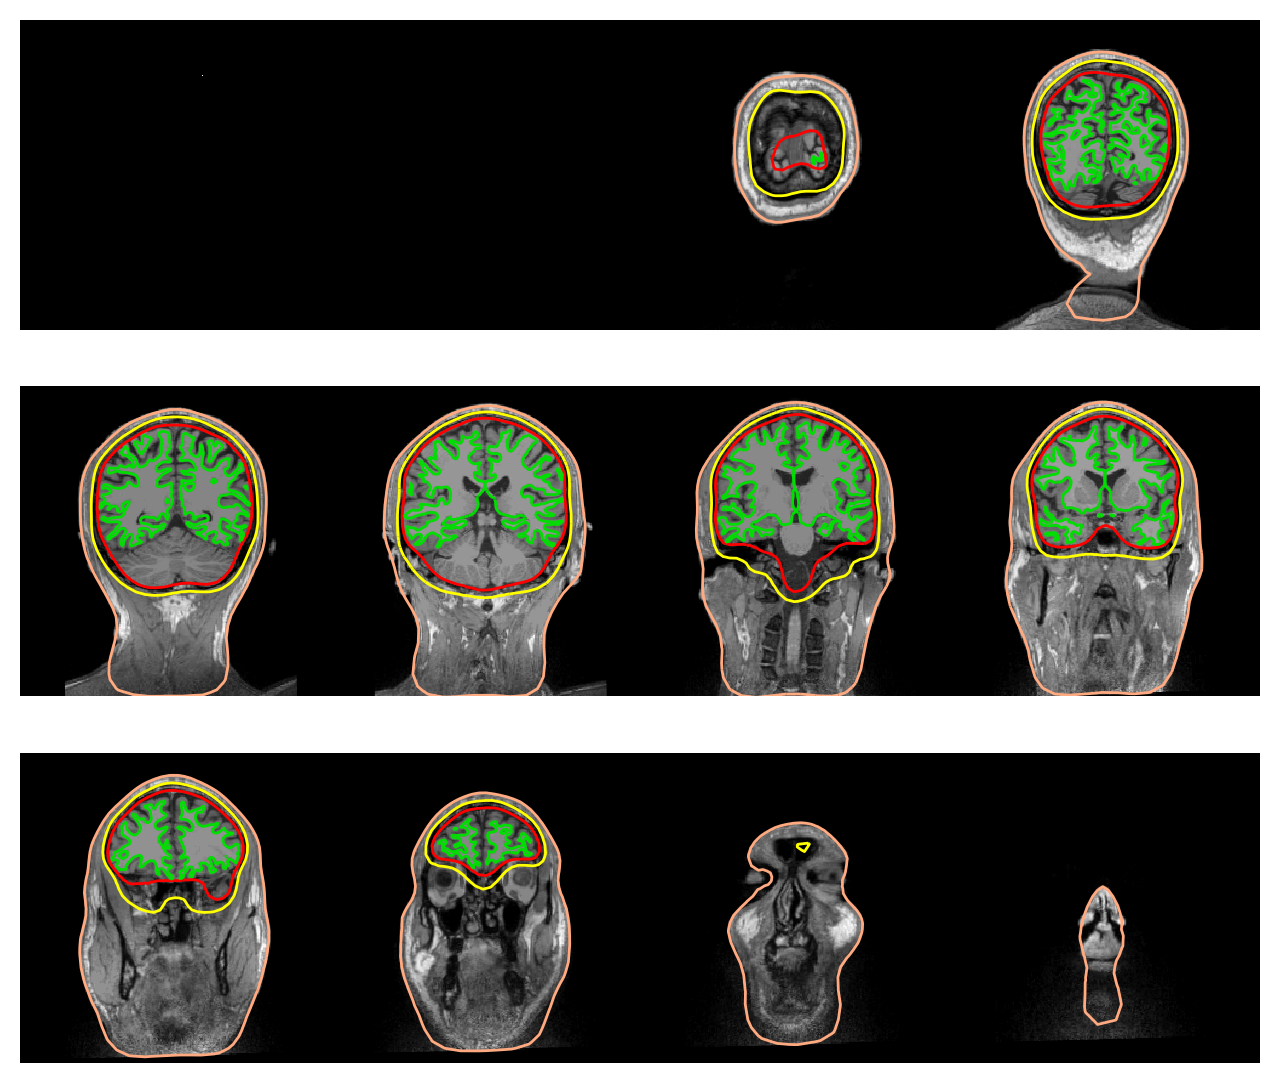

In [3]:
# just to view the surfaces
mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                 brain_surfaces='white', orientation='coronal')

In [4]:
# The transformation file obtained by coregistration
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=subjects_dir,
                       surfaces='head-dense')

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Using lh.seghead for head surface.
Getting helmet for system 306m


In [5]:
src = mne.setup_source_space(subject, spacing='oct5',
                             subjects_dir=subjects_dir, add_dist=False)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/adebimpe/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 5

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 1026/155407 selected to source space (oct = 5)

Loading /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 1026/156866 se

Boundary surface file : /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/mri/T1.mgz

Loaded bounding surface from /Users/adebimpe/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf (2562 nodes)
Surface CM = (   0.7  -10.0   44.3) mm
Surface fits inside a sphere with radius   91.8 mm
Surface extent:
    x =  -66.7 ...   68.8 mm
    y =  -88.0 ...   79.0 mm
    z =  -44.5 ...  105.8 mm
Grid extent:
    x =  -70.0 ...   70.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -45.0 ...  110.0 mm
32480 sources before omitting any.
22941 sources after omitting infeasible sources.
Source spaces are in MRI coordinates.
Checking that the sources are inside the bounding surface and at least    5.0 mm away (will take a few...)
10203 source space points omitted because they are outside the inner skull surface.
2362 source space

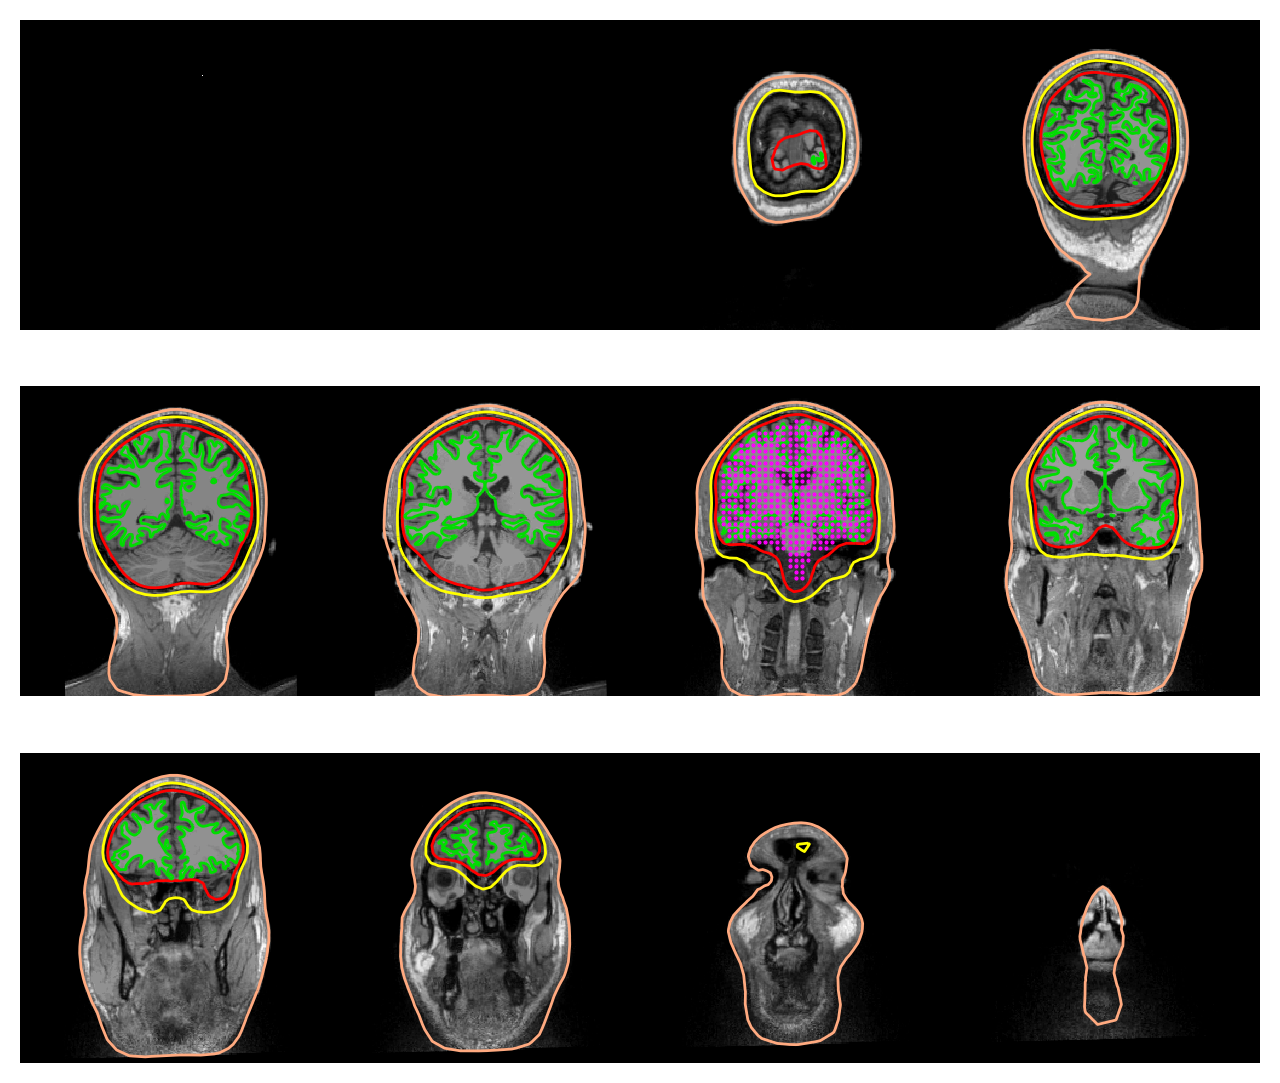

In [6]:
surface = op.join(subjects_dir, subject, 'bem', 'inner_skull.surf')
vol_src = mne.setup_volume_source_space(subject, subjects_dir=subjects_dir,
                                        surface=surface)
print(vol_src)

mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                 brain_surfaces='white', src=vol_src, orientation='coronal')

In [7]:
import numpy as np  # noqa
from mayavi import mlab  # noqa
from surfer import Brain  # noqa

brain = Brain('sample', 'lh', 'inflated', subjects_dir=subjects_dir)
surf = brain.geo['lh']

vertidx = np.where(src[0]['inuse'])[0]

mlab.points3d(surf.x[vertidx], surf.y[vertidx],
              surf.z[vertidx], color=(1, 1, 0), scale_factor=1.5)

In [8]:
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='sample', ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
inner skull CM is   0.67 -10.01  44.26 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [16]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=2)
print(fwd)
src=fwd['src']

Source space          : <SourceSpaces: [<surface (lh), n_vertices=155407, n_used=1026, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=156866, n_used=1026, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : /Users/adebimpe/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Measurement data      : sample_audvis_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 2052 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
84 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.0s finished


84 source space point omitted because of the    5.0-mm distance limit.


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.0s finished


84 source space point omitted because of the    5.0-mm distance limit.
Thank you for waiting.

Setting up compensation data...
    No compensation set. Nothing more to do.

Composing the field computation matrix...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Computing MEG at 1884 source locations (free orientations)...


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   12.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    3.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished



Finished.
<Forward | MEG channels: 306 | EEG channels: 0 | Source space: Surface with 1884 vertices | Source orientation: Free>


In [11]:
leadfield = fwd['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 306 sensors x 5652 dipoles


In [12]:
meg_path = op.join(data_path, 'MEG', subject)

# First, we get an info structure from the sample subject.
fname_info = op.join(meg_path, 'sample_audvis_raw.fif')
info = mne.io.read_info(fname_info)
tstep = 1 / info['sfreq']

# To simulate sources, we also need a source space. It can be obtained from the
# forward solution of the sample subject.
#fwd_fname = op.join(meg_path, 'sample_audvis-meg-eeg-oct-6-fwd.fif')
#fwd = mne.read_forward_solution(fwd_fname)
#src = fwd['src']

# To simulate raw data, we need to define when the activity occurs using events
# matrix and specify the IDs of each event.
# Noise covariance matrix also needs to be defined.
# Here, both are loaded from the sample dataset, but they can also be specified
# by the user.

fname_event = op.join(meg_path, 'sample_audvis_raw-eve.fif')
fname_cov = op.join(meg_path, 'sample_audvis-cov.fif')

events = mne.read_events(fname_event)
noise_cov = mne.read_cov(fname_cov)

# Standard sample event IDs. These values will correspond to the third column
# in the events matrix.
event_id = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
            'visual/right': 4, 'smiley': 5, 'button': 32}

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    366 x 366 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active


In [13]:
activations = {
    'auditory/left':
        [('G_temp_sup-G_T_transv-lh', 100),          # label, activation (nAm)
         ('G_temp_sup-G_T_transv-rh', 200)],
    'auditory/right':
        [('G_temp_sup-G_T_transv-lh', 200),
         ('G_temp_sup-G_T_transv-rh', 100)],
    'visual/left':
        [('S_calcarine-lh', 100),
         ('S_calcarine-rh', 200)],
    'visual/right':
        [('S_calcarine-lh', 200),
         ('S_calcarine-rh', 100)],
}

annot = 'aparc.a2009s'

# Load the 4 necessary label names.
label_names = sorted(set(activation[0]
                         for activation_list in activations.values()
                         for activation in activation_list))
region_names = list(activations.keys())

#  Define the time course of the activity for each region to activate. We use a
#  sine wave and it will be the same for all 4 regions.
source_time_series = np.sin(np.linspace(0, 4 * np.pi, 100)) * 10e-9

In [14]:
source_simulator = mne.simulation.SourceSimulator(src, tstep=tstep)
for region_id, region_name in enumerate(region_names, 1):
    events_tmp = events[np.where(events[:, 2] == region_id)[0], :]
    for i in range(2):
        label_name = activations[region_name][i][0]
        label_tmp = mne.read_labels_from_annot(subject, annot,
                                               subjects_dir=subjects_dir,
                                               regexp=label_name,
                                               verbose=False)
        label_tmp = label_tmp[0]
        amplitude_tmp = activations[region_name][i][1]
        source_simulator.add_data(label_tmp,
                                  amplitude_tmp * source_time_series,
                                  events_tmp)

# To obtain a SourceEstimate object, we need to use `get_stc()` method of
# SourceSimulator class.
stc_data = source_simulator.get_stc()

In [ ]:
subjects_dir = op.join(data_path, 'subjects')
subject = 'sample'
meg_path = op.join(data_path, 'MEG', subject)

# First, we get an info structure from the sample subject.
fname_info = op.join(meg_path, 'sample_audvis_raw.fif')
info = mne.io.read_info(fname_info)
tstep = 1 / info['sfreq']

# To simulate sources, we also need a source space. It can be obtained from the
# forward solution of the sample subject.
fwd_fname = op.join(meg_path, 'sample_audvis-meg-eeg-oct-6-fwd.fif')
fwd = mne.read_forward_solution(fwd_fname)
src = fwd['src']

raw_sim = mne.simulation.simulate_raw(info, source_simulator, forward=fwd,
                                      cov=None)
raw_sim.set_eeg_reference(projection=True).crop(0, 60)  # for speed

mne.simulation.add_noise(raw_sim, cov=noise_cov, random_state=0)
mne.simulation.add_eog(raw_sim, random_state=0)
mne.simulation.add_ecg(raw_sim, random_state=0)

# Plot original and simulated raw data.
raw_sim.plot(title='Simulated raw data')

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Reading forward solution from /Users/adebimpe/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
Setting up raw simulation: 1 position, "cos2" interpolation
Event 

<ipython-input-19-824fe44d44fb>:17: RuntimeWarning: Only 33 of 34 SourceEstimate vertices found in source space, likely due to forward calculations
  cov=None)


   Interval 1.665-3.330 sec
   Interval 3.330-4.995 sec
   Interval 4.995-6.660 sec
   Interval 6.660-8.325 sec
   Interval 8.325-9.990 sec
   Interval 9.990-11.655 sec
   Interval 11.655-13.320 sec
   Interval 13.320-14.985 sec
   Interval 14.985-16.650 sec
   Interval 16.650-18.315 sec
   Interval 18.315-19.980 sec
   Interval 19.980-21.644 sec
   Interval 21.644-23.309 sec
   Interval 23.309-24.974 sec
   Interval 24.974-26.639 sec
   Interval 26.639-28.304 sec
   Interval 28.304-29.969 sec
   Interval 29.969-31.634 sec
   Interval 31.634-33.299 sec
   Interval 33.299-34.964 sec
   Interval 34.964-36.629 sec
   Interval 36.629-38.294 sec
   Interval 38.294-39.959 sec
   Interval 39.959-41.624 sec
   Interval 41.624-43.289 sec
   Interval 43.289-44.954 sec
   Interval 44.954-46.619 sec
   Interval 46.619-48.284 sec
   Interval 48.284-49.949 sec
   Interval 49.949-51.614 sec
   Interval 51.614-53.279 sec
   Interval 53.279-54.944 sec
   Interval 54.944-56.609 sec
   Interval 56.609-58